# **Exercise 1**

Consider the following dataset (Petricoin et al., Lancet, 2002).  
Each column of $ \mathbf{A} $ represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 have ovarian cancer. Each row represents the concentration of a different protein in the genomic signature of the patient.

You can download the dataset using the following commands in Colab:

```bash
!wget https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv
!wget https://www.dropbox.com/s/r52sn5gmkd3y797/ovariancancer_grp.csv
```

Then you can create the matrix as follows:

```python
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()

f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

n_features = A.shape[0]
n_patients = A.shape[1]

print('%d patients' % n_patients)
print('%d features' % n_features)
```

---

### **Tasks**

1. **Implement the randomized SVD.**

2. **Perform PCA on the data, by using the exact SVD algorithm.**  
   Then, plot the trend with respect to $ i $ of the singular values $ \sigma_i $.  
   Now, repeat the computation by considering the randomized SVD algorithm of rank $ k = 1, 5, 10, 50, $ and $ 100 $.  
   Plot the approximate singular values together with the exact singular values.  
   **Comment on what you see.**

3. **Use PCA (with exact SVD) to perform dimensionality reduction on the dataset for rank $ k = 1, 5, 10, 50, $ and $ 100 $.**  
   Compute the reconstruction error of the dataset as a function of $ k $.  
   Repeat the same exercise by using the randomized SVD algorithm.  
   Repeat the same exercise by using the randomized SVD algorithm **with a +50% oversampling**, that is, by increasing by 50% the number of columns in the matrix random $ \mathbf{P} $ (round the quantity $ 1.5k $ to the closest integer).  
   Finally, plot the trend of the reconstruction error of the dataset as a function of $ k $ in the three cases.  
   **Comment on the results.**

4. **Make a scatterplot of the first two principal components of the patients (obtained with exact SVD).**  
   - Plot in **red** the patients in the group "cancer" and in **blue** the patients in the remaining group.  
   - Repeat the same exercise with a rank $ k = 2 $ randomized SVD.  
   - Compute the execution time needed to run the SVD algorithm in the two cases.  
   **Comment on the results.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'
A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']
n_features = A.shape[0]
n_patients = A.shape[1]
print('%d patients' % n_patients)
print('%d features' % n_features)

216 patients
4000 features


1. **Implement the randomized SVD.**

In [2]:
def rSVD(A, k):
	n = A.shape[1]
	p = min(k, n)
	Q = np.random.randn(n, p)
	Y = A @ Q
	Q, _ = np.linalg.qr(Y)
	B = Q.T @ A
	U_tilde, s, V = np.linalg.svd(B, full_matrices=False)
	U = Q @ U_tilde
	return U, s, V

2. **Perform PCA on the data, by using the exact SVD algorithm.**  
   Then, plot the trend with respect to $ i $ of the singular values $ \sigma_i $.  
   Now, repeat the computation by considering the randomized SVD algorithm of rank $ k = 1, 5, 10, 50, $ and $ 100 $.  
   Plot the approximate singular values together with the exact singular values.  
   **Comment on what you see.**

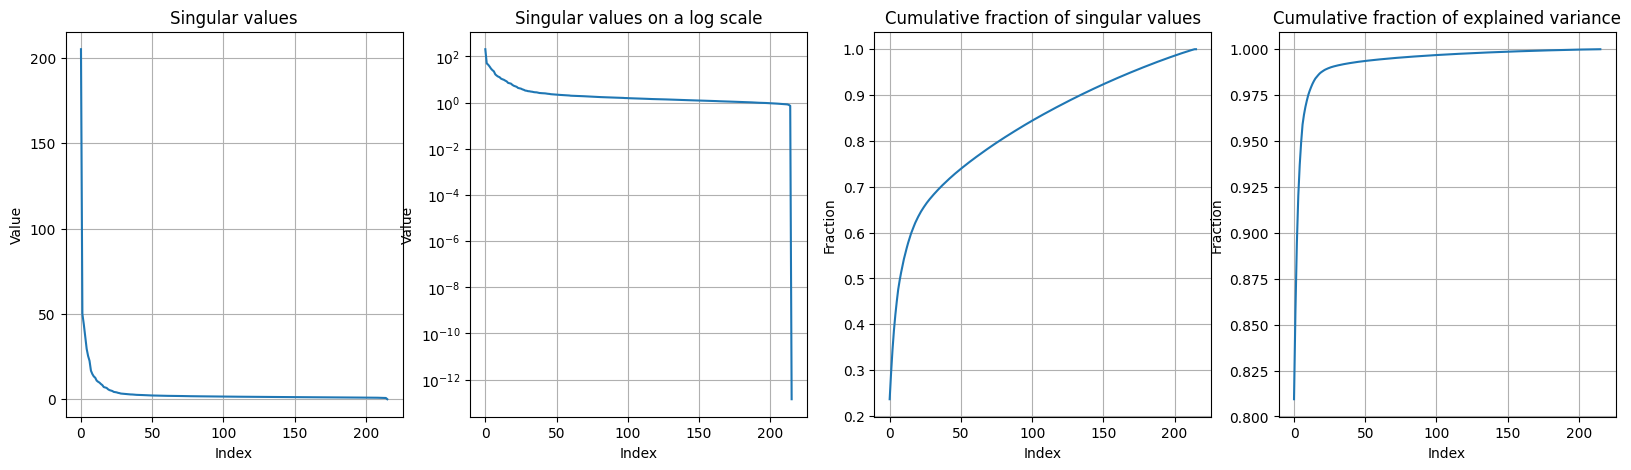

In [3]:
# center the data
A_centered = A - np.mean(A, axis=1)[:, None]

# Note: I don't standardize the date because all the features are representing
# the concentration of a protein in the blood, so they are already on the same scale

# perform SVD

U, s, VT = np.linalg.svd(A_centered, full_matrices=False) # full_matrices=False for faster computation


fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# plot the singular values
ax[0].plot(s)
ax[0].set_title('Singular values')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Value')
ax[0].grid()

# not required but can be meaningful
# plot the singular values on a log scale
ax[1].semilogy(s)
ax[1].set_title('Singular values on a log scale')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Value')
ax[1].grid()

# not required but can be meaningful
# plot the cumulative fraction of singular values
ax[2].plot(np.cumsum(s) / np.sum(s))
ax[2].set_title('Cumulative fraction of singular values')
ax[2].set_xlabel('Index')
ax[2].set_ylabel('Fraction')
ax[2].grid()

# not required but can be meaningful
# plot the cumulative fraction of explained variance
ax[3].plot(np.cumsum(s ** 2) / np.sum(s ** 2))
ax[3].set_title('Cumulative fraction of explained variance')
ax[3].set_xlabel('Index')
ax[3].set_ylabel('Fraction')
ax[3].grid()


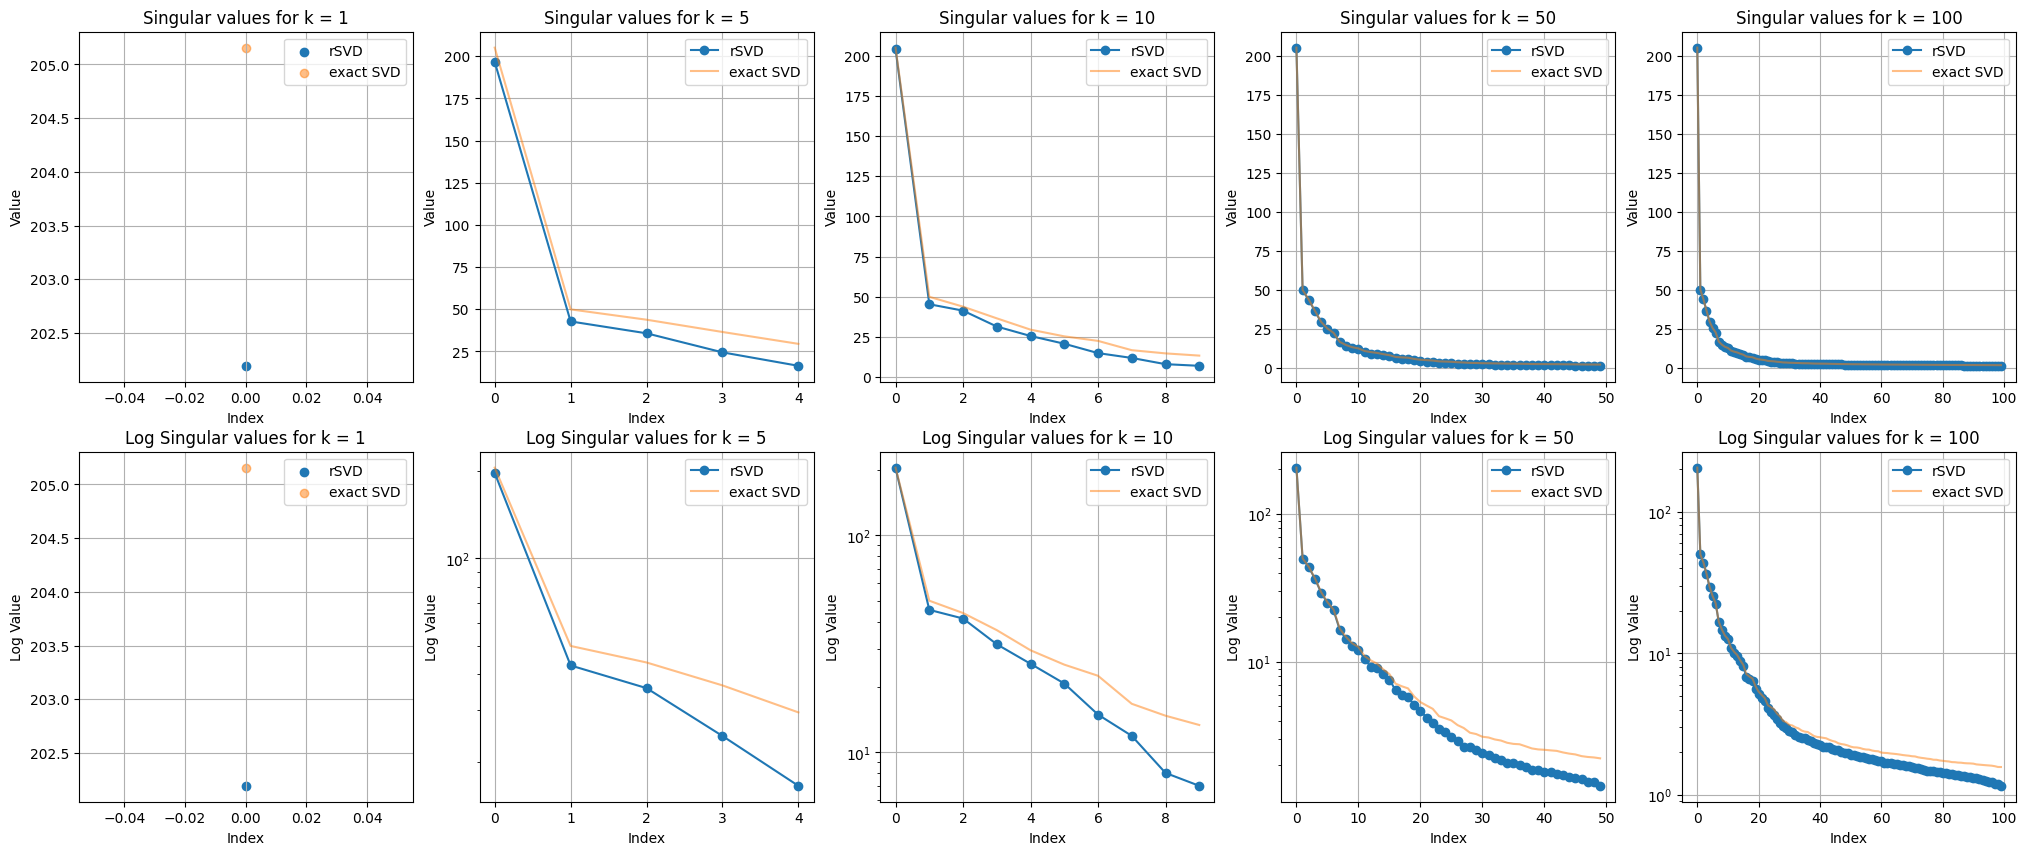

In [4]:
# repeat using randomized SVD for k = 1,5,10,50,100
k_values = [1, 5, 10, 50, 100]

# seed for reproducibility
np.random.seed(42)

fig, ax = plt.subplots(2, len(k_values), figsize=(25, 10))
for i, k in enumerate(k_values):
	U_rSVD, s_rSVD, VT_rSVD = rSVD(A_centered, k)
	if len(s_rSVD) <= 1:
		# we make a scatter plot for k = 1
		ax[0, i].scatter([0], s_rSVD, label='rSVD')
		ax[0, i].scatter([0], s[:1], label='exact SVD', alpha=0.5)
	else:
		ax[0, i].plot(s_rSVD, 'o-', label='rSVD')
		ax[0, i].plot(s[:k], label='exact SVD', alpha=0.5)
	ax[0, i].set_title('Singular values for k = %d' % k)
	ax[0, i].set_xlabel('Index')
	ax[0, i].set_ylabel('Value')
	ax[0, i].grid()
	ax[0, i].legend()

	# logarithmic plot
	if len(s_rSVD) <= 1:
		ax[1, i].scatter([0], s_rSVD, label='rSVD')
		ax[1, i].scatter([0], s[:1], label='exact SVD', alpha=0.5)
	else:
		ax[1, i].semilogy(s_rSVD, 'o-', label='rSVD')
		ax[1, i].semilogy(s[:k], label='exact SVD', alpha=0.5)
	ax[1, i].set_title('Log Singular values for k = %d' % k)
	ax[1, i].set_xlabel('Index')
	ax[1, i].set_ylabel('Log Value')
	ax[1, i].grid()
	ax[1, i].legend()

#### comment:

For very low values of k (k=1) the difference between the two SVD algorithm is quite meaningful, while when increasing k this difference reduces, as much as having almost identical plot for k=50 or k=100. Nonetheless the results are not identical, as highlighted in the log-scaled plot (2nd row). Here it is highlighted how the 'tail' representing the less significant singular values is always diverging. This problem is well known and its the reason why alternative versions of rSVD exists such as rSVD with oversampling. 

3. **Use PCA (with exact SVD) to perform dimensionality reduction on the dataset for rank $ k = 1, 5, 10, 50, $ and $ 100 $.**  
   Compute the reconstruction error of the dataset as a function of $ k $.  
   Repeat the same exercise by using the randomized SVD algorithm.  
   Repeat the same exercise by using the randomized SVD algorithm **with a +50% oversampling**, that is, by increasing by 50% the number of columns in the matrix random $ \mathbf{P} $ (round the quantity $ 1.5k $ to the closest integer).  
   Finally, plot the trend of the reconstruction error of the dataset as a function of $ k $ in the three cases.  
   **Comment on the results.**

In [5]:
def rSVD_oversampling(A, k, ov):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, int(k*ov))
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT

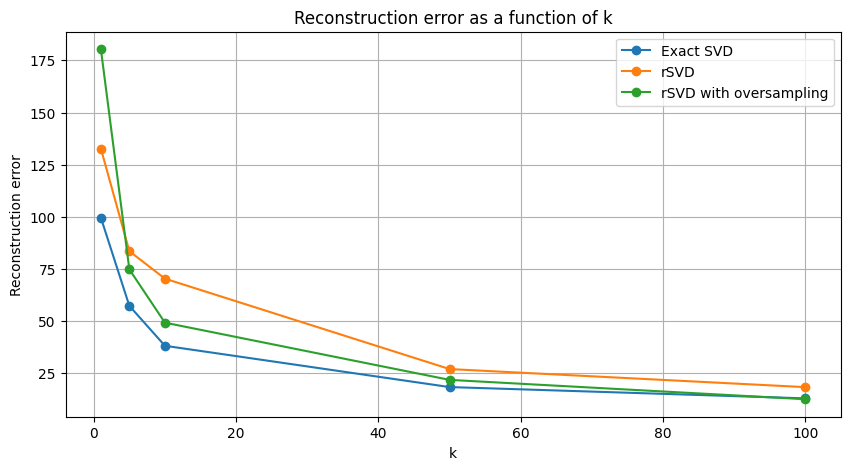

In [6]:
k_values = [1, 5, 10, 50, 100]

reconstruction_errors = {
	'exact_SVD': [],
	'rSVD': [],
	'rSVD_w_oversampling': []
}

for k in k_values:
	# Exact SVD
	U, s, VT = np.linalg.svd(A_centered, full_matrices=False)
	U_k = U[:, :k]
	s_k = s[:k]
	VT_k = VT[:k, :]
	A_k = U_k @ np.diag(s_k) @ VT_k
	error = np.linalg.norm(A_centered - A_k, 'fro')
	reconstruction_errors['exact_SVD'].append(error)

	# Randomized SVD
	U_rSVD, s_rSVD, VT_rSVD = rSVD(A_centered, k)
	A_k_rSVD = U_rSVD @ np.diag(s_rSVD) @ VT_rSVD
	error_rSVD = np.linalg.norm(A_centered - A_k_rSVD, 'fro')
	reconstruction_errors['rSVD'].append(error_rSVD)

	# Randomized SVD with oversampling
	U_rSVD_os, s_rSVD_os, VT_rSVD_os = rSVD_oversampling(A_centered, k, 1.5)
	A_rSVD_os = U_rSVD_os @ np.diag(s_rSVD_os) @ VT_rSVD_os
	error_rSVD_os = np.linalg.norm(A_centered - A_rSVD_os, 'fro')
	reconstruction_errors['rSVD_w_oversampling'].append(error_rSVD_os)

# plot the reconstruction errors as a function of k
plt.figure(figsize=(10, 5))
plt.plot(k_values, reconstruction_errors['exact_SVD'], 'o-', label='Exact SVD')
plt.plot(k_values, reconstruction_errors['rSVD'],  'o-', label='rSVD')
plt.plot(k_values, reconstruction_errors['rSVD_w_oversampling'], 'o-', label='rSVD with oversampling')
plt.title('Reconstruction error as a function of k')
plt.xlabel('k')
plt.ylabel('Reconstruction error')
plt.grid()
plt.legend()
plt.show()

#### comment:
As expected the best reconstruction is obtained when using the exact SVD algorithm, followed by the rSVD with oversampling and finally the rSVD. The difference between the three methods is more evident for low values of k, while it reduces when increasing k. For high values of k the difference between rSVD with oversampling and exact SVD is almost negligible.
Furthermore given that the seedup of using randomized SVD is quite significant, it is worth to use it (or at least evaluate it) when the dataset is large and the computational time is a constraint.

4. **Make a scatterplot of the first two principal components of the patients (obtained with exact SVD).**  
   - Plot in **red** the patients in the group "cancer" and in **blue** the patients in the remaining group.  
   - Repeat the same exercise with a rank $ k = 2 $ randomized SVD.  
   - Compute the execution time needed to run the SVD algorithm in the two cases.  
   **Comment on the results.**

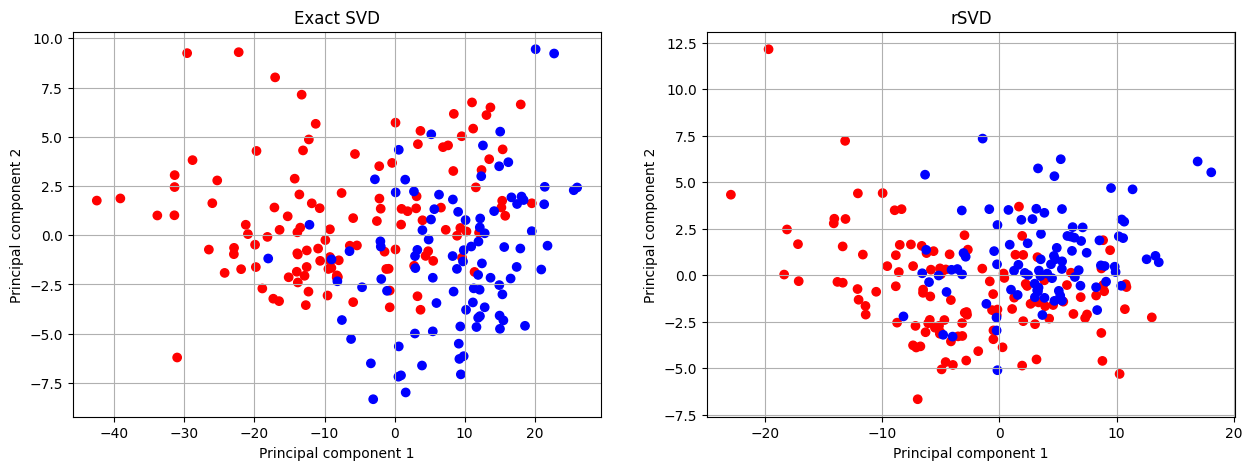

In [7]:
U, s, VT = np.linalg.svd(A_centered, full_matrices=False)

principal_directions = U.T[:2]
principal_components = principal_directions @ A_centered


# rSVD
np.random.seed(42) # for reproducibility
U_rSVD, s_rSVD, VT_rSVD = rSVD(A_centered, 2)

principal_directions_rSVD = U_rSVD.T
# set the sign of the directions to be consistent with the exact SVD
# this will not change the properties but will make the plots more comparable to the human eye
for i in range(2):
	if np.dot(principal_directions_rSVD[i], principal_directions[i]) < 0:
		principal_directions_rSVD[i] *= -1

principal_components_rSVD = principal_directions_rSVD @ A_centered



# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, (principal_components, title) in enumerate([(principal_components, 'Exact SVD'), (principal_components_rSVD, 'rSVD')]):
	ax[i].scatter(principal_components[0], principal_components[1], c=['r' if x == 'Cancer' else 'b' for x in grp])
	ax[i].set_title(title)
	ax[i].set_xlabel('Principal component 1')
	ax[i].set_ylabel('Principal component 2')
	ax[i].grid()
plt.show()

In [8]:
# execturion times:
%timeit U, s, VT = np.linalg.svd(A_centered, full_matrices=False)

%timeit U_rSVD, s_rSVD, VT_rSVD = rSVD(A_centered, 2)

126 ms ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.95 ms ± 284 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### comment:
The scale of the two principal components it's quite similar, but it is clear that there are some important differences in the principal directions found by the two algorithms. 
The general shape of the obtained plot is similar and both of them are able to only partially separate the two groups. 
The execution time of the two algorithms is quite different, with the exact SVD being much slower than the randomized SVD, the speedup factor is in the order of 100x.


---

# **Exercise 2**

Consider the subset of the Quantum Physics Dataset provided by Cornell University.  
The goal is to learn a classification rule that differentiates between two types of particles generated in high-energy collider experiments.

Load the data as follows:

```python
X = np.genfromtxt('X.dat')  # Features
y = np.genfromtxt('y.dat')  # Labels (+1, -1)
```

The classification task involves solving the following minimization problem:

$$
\min_{w} J(w) = \frac{1}{N} \sum_{i} J_i(w),
$$

where

$$
J_i(w) = L(w^\top x_i, y_i),
$$

with the loss function defined as:

$$
L(s, y) = \log(1 + \exp(-sy)).
$$

### **Tasks**

1. **Implement the Stochastic Gradient Descent (SGD) algorithm**  
   - Use a batch size of 1.  
   - Set the learning rate to 0.5.  
   - Perform 5000 iterations.  
   - Initialize the weight vector to zero.

2. **Repeat the minimization using SGD with a variable learning rate,** defined as:

$$
\eta_k = \frac{\eta_0}{1 + \frac{k}{100}},
$$

where $ k $ is the iteration number, and $ \eta_0 = 0.05 $.

### **Comments**  
Discuss the results obtained with the constant learning rate and the variable learning rate methods.


In [9]:
X = np.genfromtxt('X.dat')  # Features
y = np.genfromtxt('y.dat')  # Labels (+1, -1)

print(X.shape)
print(y.shape)

print('Number of features:', X.shape[1])
print('Number of samples:', X.shape[0])

(10000, 46)
(10000,)
Number of features: 46
Number of samples: 10000


In [10]:
import jax
import jax.numpy as jnp

def log_loss(X, y, w):
	return jnp.log(1 + jnp.exp(-y * (X @ w))).mean()

1. **Implement the Stochastic Gradient Descent (SGD) algorithm**  
   - Use a batch size of 1.  
   - Set the learning rate to 0.5.  
   - Perform 5000 iterations.  
   - Initialize the weight vector to zero.


In [11]:
from tqdm.notebook import tqdm
def SGD(X, y, x_0, loss, grad_loss, lr, n_iterations=5000, batch_size=1):
	xs = [x_0]
	losses = [loss(X, y, x_0)]
	n_epochs = n_iterations // len(X) + 1

	for epoch in range(n_epochs):
		indeces = np.random.permutation(len(X))
		X_shuffled = X[indeces]
		y_shuffled = y[indeces]
		remaining_iterations = n_iterations - epoch * len(X)
		for i in tqdm(range(0, min(len(X), remaining_iterations)//batch_size, batch_size)):
			x = xs[-1]
			grad = grad_loss(X_shuffled[i:i+batch_size], y_shuffled[i:i+batch_size], x)
			x = x - lr(len(X)*epoch + i) * grad
			xs.append(x)
			losses.append(loss(X, y, x))
	return np.array(xs), np.array(losses)

In [13]:
grad_loss = jax.grad(jax.jit(log_loss), argnums=2)

batch_size = 1

def constant_lr(epoch):
	return 0.5

n_epochs = 5000

x_0 = np.zeros(X.shape[1])

np.random.seed(42)
xs, losses = SGD(X, y, x_0, log_loss, grad_loss, constant_lr, n_iterations=n_epochs, batch_size=batch_size)


  0%|          | 0/5000 [00:00<?, ?it/s]

2. **Repeat the minimization using SGD with a variable learning rate,** defined as:

In [14]:
grad_loss = jax.grad(jax.jit(log_loss), argnums=2)

batch_size = 1

def var_lr(k):
	return 0.05/(k/100+1)

n_epochs = 5000

x_0 = np.zeros(X.shape[1])

np.random.seed(42)
xs_var, losses_var = SGD(X, y, x_0, log_loss, grad_loss, var_lr, n_iterations=n_epochs, batch_size=batch_size)


  0%|          | 0/5000 [00:00<?, ?it/s]

**Discuss the results obtained with the constant learning rate and the variable learning rate methods.**

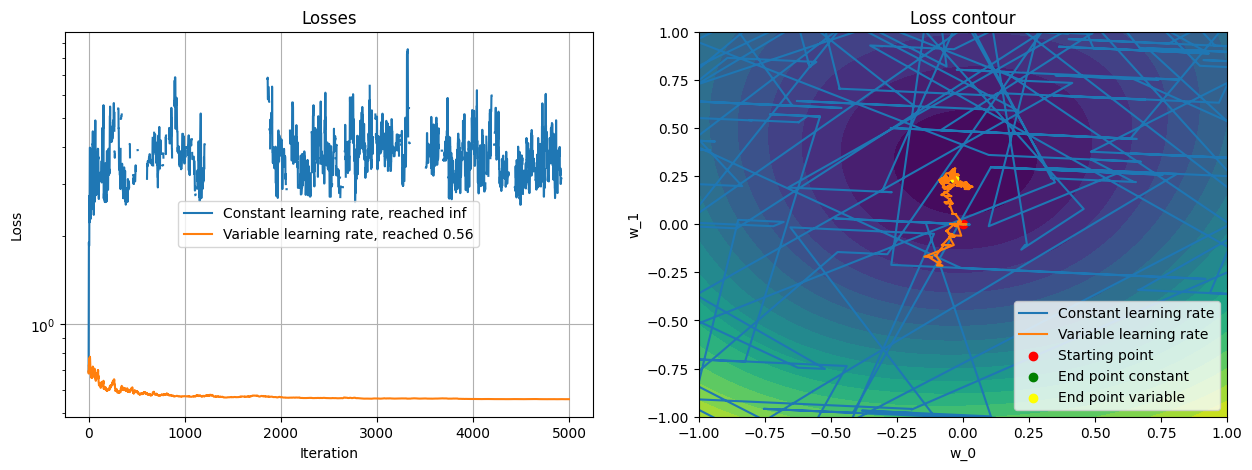

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# on the left the losses with constant and variable learning rates
axs[0].semilogy(losses, label=f'Constant learning rate, reached {losses[-1]:.2f}')
axs[0].semilogy(losses_var, label=f'Variable learning rate, reached {losses_var[-1]:.2f}')
axs[0].set_title('Losses')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid()

# on the right the values for x over a countourf of the loss funtion over the first two directions
x_ = np.linspace(-1, 1, 100)
y_ = np.linspace(-1, 1, 100)
X_, Y_ = np.meshgrid(x_, y_)
Z = np.zeros_like(X_)
for i in range(len(x_)):
	for j in range(len(y_)):
		w = np.zeros_like(x_0)
		w[0] = x_[i]
		w[1] = y_[j]
		Z[i, j] = log_loss(X, y, w)
axs[1].contourf(X_, Y_, Z.T, levels=20)
axs[1].plot(xs[:, 0], xs[:, 1], label='Constant learning rate')
axs[1].plot(xs_var[:, 0], xs_var[:, 1], label='Variable learning rate')
axs[1].set_title('Loss contour')
axs[1].set_xlabel('w_0')
axs[1].set_ylabel('w_1')
axs[1].set_ylim(-1, 1)
axs[1].set_xlim(-1, 1)
axs[1].scatter([0], [0], c='r', label='Starting point')
axs[1].scatter([xs[-1][0]],[xs[-1][1]], c='g', label='End point constant')
axs[1].scatter([xs_var[-1][0]],[xs_var[-1][1]], c='yellow', label='End point variable')
axs[1].legend()
plt.show()

#### comment:

It is clear how, when using a big and constant learning rate SGD is not able to converge to the optimal solution. In particular the loss often overflows and the algorithm is not able to find the optimal solution. 
When using a smaller and variable learning rate the algorithm is able to converge to the optimal solution in a quite smooth way.
It is also important to note how solution reached by the variable learning rate is not the trivial one (w=0), where the loss is equal to 0.693, which may happen when using cross-entropy loss.


---

# Exercise 3

Show that a multi-layer neural network with linear activation function s(x) = x is equivalent to a single layer
linear network. 

Assume that in each layer the inputs follow a Normal distribution with mean zero and small
variance, i.e. σ ≪ 1. For which of the activation functions s(x) = 1/(1 + exp(−x)), s(x) = tanh(x), s(x) =
relu(x) and s(x) = selu(x) is a deep network equivalent to a linear network for the given distribution ? The
selu function is given by:
<br>
$$
selu(x) = \begin{cases}
\text{$\lambda x$}, & \text{if $x > 0$}\\
\text{$\alpha (\exp(x)-1)$}, & \text{otherwise}
\end{cases}
$$

where λ ≈ 1.0507 and α ≈ 1.75814. (Hint: consider the case σ → 0 using a Taylor expansion around 0.)

#### Answer:

To show that a multi-layer neural network with a linear activation function $ s(x) = x $ we can follow these steps:
1. The composition of linear functions is itself a linear function. So, if you have multiple layers of neurons, each applying a linear transformation to its inputs, and the activation function is linear, the overall transformation from the input layer to the output layer is still linear. (note that the identity is obviously a linear function)
2. Since the overall transformation of a multi-layer network with linear activations is linear, then exists to a single-layer linear network that have the same output of this network. 

Now, let's consider the other activation functions for the case where inputs follow a Normal distribution with mean zero and small variance $\sigma $ and determine if a deep network is equivalent to a linear network. When sigma is small than we can consider the input x around 0. If the output of the activation function can be approximated as a linear function in the poximity of 0 then the behaviour of the deep neural network may be approximated with a single neuronz.
1. **Sigmoid $ s(x) = \frac{1}{1 + \exp(-x)} $:**
   The Taylor expansion of the sigmoid function around 0 is $ \frac{1}{2} + \frac{x}{4} - \frac{x^3}{48} + O(x^5) $. 
   For very small x, the higher-order terms become negligible, and the function behaves almost linearly around 0. 
2. **Tanh $ s(x) = \tanh(x) $:**
   The Taylor expansion of the tanh function around 0 is $ x - \frac{x^3}{3} + O(x^5) $. Similar to the sigmoid, for very small x tanh behaves almost linearly around 0.
3. **ReLU $ s(x) = \text{relu}(x) $:**
   The ReLU function is linear for $ x > 0 $ but zero for $ x \leq 0 $. Even for small x, ReLU does not behave linearly due to the point of discontinuity in its derivative at zero.
4. **SeLU:**
   For $ x > 0 $, SeLU is linear. For $ x \leq 0 $, it's $ \alpha(\exp(x) - 1) $. The Taylor expansion around 0 for the negative part tends to $\alpha$ while in the positive part tends to $\lambda$ so for small x, SeLU does not behave as a linear function due to this discontinuity.

In conclusion, for very small input x, sigmoid and tanh functions behave almost linearly, but they are not strictly equivalent to linear functions so a deep network with these activation functions is almost equivalent to a linear network. 
ReLU and SeLU are not linear even for small x, therefore, a deep network with these activation functions is not equivalent to a linear network.